In [149]:
#Dependencies
import json
import pandas as pd
import requests as req
import matplotlib.pyplot as plt
from citipy import citipy
import numpy as np
import time
import datetime
## Installed citipy library
##pip install citipy 

In [150]:
### Generate cities list 
## Tried changing longitude range to get different results
lats= np.random.uniform(-90,90,550)
lngs=np.random.uniform(-180,180,550)
#lats=np.random.randint(low=-90, high=90, size=1000)
#lngs=np.random.randint(low=-180,high=180,size=1000)
city_cordinates=dict(zip(lats,lngs))

In [151]:
city_list=[]
city_lat=[]
city_lng=[]
for key,value in city_cordinates.items():
         city=citipy.nearest_city(key,value)
         city_list.append(city.city_name)
         city_lat.append(key)
         city_lng.append(value)

In [152]:
## Rounding 
city_lat=[int(round(n,0)) for n in city_lat]
city_lng=[int(round(n,0))for n in city_lng]

In [153]:
city_pd=pd.DataFrame({"city":city_list,
                      "lats":city_lat,
                       "lngs":city_lng})
city_pd.head()

,city,lats,lngs
0,morena,26,78
1,busselton,-86,77
2,kaitangata,-56,173
3,college,68,-150
4,vaini,-89,-173


In [154]:
# Dropping duplicates and also get to know the numbero cities
city_pd=city_pd.drop_duplicates()
len(city_pd)

545

In [156]:
# Randomly select 500 cities
selected_cities = city_pd.sample(n=510)
# Visualize
selected_cities.head()

,city,lats,lngs
504,margate,-38,37
486,torbay,43,-52
137,castro,-49,-103
245,ushuaia,-89,-51
414,dikson,87,80


In [157]:
len(selected_cities)

510

In [158]:
# Weather API Key
api_key = "62e6c158794571605e5f2b3046aa6eac"

In [159]:
# Create blank columns for necessary fields
selected_cities["temp"] = ""
selected_cities["humidity%"] = ""
selected_cities["cloudiness%"] = ""
selected_cities["windspeed"] = ""

# Counter
row_count = 0

# Loop through and grab the lat/lng 

for index, row in selected_cities.iterrows():
   #target_url = "http://api.openweathermap.org/data/2.5/history?q=%s&units=IMPERIAL&mode=json&APPID=%s" %(selected_cities["city"],api_key)
   #target_url = "http://api.openweathermap.org/data/2.5/weather?lat=%s&lon=%s&units=IMPERIAL&mode=json&APPID=%s" %(row["lats"],row["lngs"],api_key)
    
    target_url = "http://api.openweathermap.org/data/2.5/weather?q=%s&units=IMPERIAL&mode=json&APPID=%s" %(row["city"],api_key)
  # Print log to ensure loop is working correctly
    print("Now retrieving city #"+ str(row_count)+" City Name"+row["city"])
    print(target_url)
    row_count+=1
    
    # Run requests to grab the JSON at the requested URL
    city_weather = req.get(target_url).json()
    # Append the lat/lng to the appropriate columns
    # Use try / except to skip any cities with errors
    try: 
        city_temp = city_weather["main"]["temp_max"]
        city_humidity=city_weather["main"]["humidity"]
        city_clouds=city_weather["clouds"]["all"]
        city_wind=city_weather["wind"]["speed"]
        
        selected_cities.set_value(index, "temp", city_temp)
        selected_cities.set_value(index, "humidity%", city_humidity)
        selected_cities.set_value(index, "cloudiness%", city_clouds)
        selected_cities.set_value(index, "windspeed", city_wind)
        
    except:
        print("Error with city data. Skipping")
        continue

Now retrieving city #0 City Namemargate
http://api.openweathermap.org/data/2.5/weather?q=margate&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #1 City Nametorbay
http://api.openweathermap.org/data/2.5/weather?q=torbay&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #2 City Namecastro
http://api.openweathermap.org/data/2.5/weather?q=castro&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #3 City Nameushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #4 City Namedikson
http://api.openweathermap.org/data/2.5/weather?q=dikson&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #5 City Nameushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #6 City Namekieta
ht

Now retrieving city #51 City Namebarentsburg
http://api.openweathermap.org/data/2.5/weather?q=barentsburg&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Error with city data. Skipping
Now retrieving city #52 City Namekharp
http://api.openweathermap.org/data/2.5/weather?q=kharp&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #53 City Namerocha
http://api.openweathermap.org/data/2.5/weather?q=rocha&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #54 City Namevictoria
http://api.openweathermap.org/data/2.5/weather?q=victoria&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #55 City Namehermanus
http://api.openweathermap.org/data/2.5/weather?q=hermanus&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #56 City Namecape town
http://api.openweathermap.org/data/2.5/weather?q=cape town&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b

Now retrieving city #100 City Nameeast london
http://api.openweathermap.org/data/2.5/weather?q=east london&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #101 City Nameleningradskiy
http://api.openweathermap.org/data/2.5/weather?q=leningradskiy&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #102 City Namebredasdorp
http://api.openweathermap.org/data/2.5/weather?q=bredasdorp&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #103 City Nameluorong
http://api.openweathermap.org/data/2.5/weather?q=luorong&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #104 City Namesechura
http://api.openweathermap.org/data/2.5/weather?q=sechura&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #105 City Nameupernavik
http://api.openweathermap.org/data/2.5/weather?q=upernavik&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b304

Now retrieving city #150 City Namekegalla
http://api.openweathermap.org/data/2.5/weather?q=kegalla&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Error with city data. Skipping
Now retrieving city #151 City Namebaker city
http://api.openweathermap.org/data/2.5/weather?q=baker city&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #152 City Namekismayo
http://api.openweathermap.org/data/2.5/weather?q=kismayo&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Error with city data. Skipping
Now retrieving city #153 City Namenikolskoye
http://api.openweathermap.org/data/2.5/weather?q=nikolskoye&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #154 City Namepunta arenas
http://api.openweathermap.org/data/2.5/weather?q=punta arenas&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #155 City Namesoyo
http://api.openweathermap.org/data/2.5/weather?q=soyo&units=IM

Now retrieving city #198 City Nameadrar
http://api.openweathermap.org/data/2.5/weather?q=adrar&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #199 City Namebusselton
http://api.openweathermap.org/data/2.5/weather?q=busselton&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #200 City Namemahebourg
http://api.openweathermap.org/data/2.5/weather?q=mahebourg&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #201 City Namebelmonte
http://api.openweathermap.org/data/2.5/weather?q=belmonte&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #202 City Namepuerto ayora
http://api.openweathermap.org/data/2.5/weather?q=puerto ayora&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #203 City Namehokitika
http://api.openweathermap.org/data/2.5/weather?q=hokitika&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now 

Now retrieving city #248 City Nametupik
http://api.openweathermap.org/data/2.5/weather?q=tupik&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #249 City Namestephenville crossing
http://api.openweathermap.org/data/2.5/weather?q=stephenville crossing&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #250 City Namelavrentiya
http://api.openweathermap.org/data/2.5/weather?q=lavrentiya&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #251 City Nameavarua
http://api.openweathermap.org/data/2.5/weather?q=avarua&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #252 City Namepelaya
http://api.openweathermap.org/data/2.5/weather?q=pelaya&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #253 City Namejamestown
http://api.openweathermap.org/data/2.5/weather?q=jamestown&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b304

Now retrieving city #297 City Namebethel
http://api.openweathermap.org/data/2.5/weather?q=bethel&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #298 City Namelata
http://api.openweathermap.org/data/2.5/weather?q=lata&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #299 City Namerikitea
http://api.openweathermap.org/data/2.5/weather?q=rikitea&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #300 City Namepuerto pinasco
http://api.openweathermap.org/data/2.5/weather?q=puerto pinasco&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Error with city data. Skipping
Now retrieving city #301 City Nameziarat
http://api.openweathermap.org/data/2.5/weather?q=ziarat&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #302 City Namearaouane
http://api.openweathermap.org/data/2.5/weather?q=araouane&units=IMPERIAL&mode=json&APPID=62e6c158794571605e

Now retrieving city #346 City Namekerteh
http://api.openweathermap.org/data/2.5/weather?q=kerteh&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Error with city data. Skipping
Now retrieving city #347 City Namecape town
http://api.openweathermap.org/data/2.5/weather?q=cape town&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #348 City Nameyellowknife
http://api.openweathermap.org/data/2.5/weather?q=yellowknife&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #349 City Nameilloqqortoormiut
http://api.openweathermap.org/data/2.5/weather?q=illoqqortoormiut&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Error with city data. Skipping
Now retrieving city #350 City Namebutaritari
http://api.openweathermap.org/data/2.5/weather?q=butaritari&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #351 City Nameteknaf
http://api.openweathermap.org/data/2.5/weather?q

Now retrieving city #396 City Namebethel
http://api.openweathermap.org/data/2.5/weather?q=bethel&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #397 City Namesan patricio
http://api.openweathermap.org/data/2.5/weather?q=san patricio&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #398 City Namebirjand
http://api.openweathermap.org/data/2.5/weather?q=birjand&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #399 City Namesorvag
http://api.openweathermap.org/data/2.5/weather?q=sorvag&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Error with city data. Skipping
Now retrieving city #400 City Namezheleznodorozhnyy
http://api.openweathermap.org/data/2.5/weather?q=zheleznodorozhnyy&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #401 City Namenew norfolk
http://api.openweathermap.org/data/2.5/weather?q=new norfolk&units=IMPERIAL&mode=j

Error with city data. Skipping
Now retrieving city #445 City Namebambous virieux
http://api.openweathermap.org/data/2.5/weather?q=bambous virieux&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #446 City Namemataura
http://api.openweathermap.org/data/2.5/weather?q=mataura&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #447 City Nametaolanaro
http://api.openweathermap.org/data/2.5/weather?q=taolanaro&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Error with city data. Skipping
Now retrieving city #448 City Namebambous virieux
http://api.openweathermap.org/data/2.5/weather?q=bambous virieux&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #449 City Namefortuna
http://api.openweathermap.org/data/2.5/weather?q=fortuna&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #450 City Namesouillac
http://api.openweathermap.org/data/2.5/weath

Now retrieving city #495 City Namechuy
http://api.openweathermap.org/data/2.5/weather?q=chuy&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #496 City Nameantalaha
http://api.openweathermap.org/data/2.5/weather?q=antalaha&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #497 City Namehuntingdon
http://api.openweathermap.org/data/2.5/weather?q=huntingdon&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #498 City Namebusselton
http://api.openweathermap.org/data/2.5/weather?q=busselton&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #499 City Namekapaa
http://api.openweathermap.org/data/2.5/weather?q=kapaa&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrieving city #500 City Namepuerto ayora
http://api.openweathermap.org/data/2.5/weather?q=puerto ayora&units=IMPERIAL&mode=json&APPID=62e6c158794571605e5f2b3046aa6eac
Now retrie

In [160]:
############Below is to understand what is required to get the data from Dictionary, You can ignore###
#city_weather["main"]["temp"]
#city_weather["main"]["humidity"]
#city_weather["clouds"]["all"]
#city_weather["wind"]["speed"]

In [161]:
# Visualize
selected_cities.replace('',np.nan,inplace=True)
selected_cities
selected_cities.dropna(axis=0,how='any')

,city,lats,lngs,temp,humidity%,cloudiness%,windspeed
504,margate,-38,37,59.00,41.0,20.0,13.87
486,torbay,43,-52,24.80,85.0,90.0,5.82
137,castro,-49,-103,51.73,76.0,76.0,4.88
245,ushuaia,-89,-51,53.60,54.0,75.0,13.87
414,dikson,87,80,2.41,100.0,76.0,26.24
495,ushuaia,-72,-71,53.60,54.0,75.0,13.87
173,kieta,-2,158,79.94,100.0,80.0,2.04
11,constantine,36,7,44.60,93.0,75.0,2.04
413,vaini,-78,-177,56.86,78.0,0.0,3.76
419,mataura,-79,-147,78.41,35.0,24.0,14.38


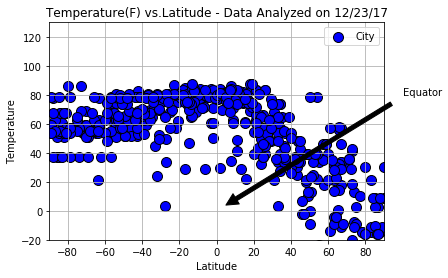

In [162]:
#

# Build a scatter plot for each data type
plt.scatter(selected_cities["lats"], selected_cities["temp"], color='b',edgecolor="black", linewidths=1, marker="o",s=100, alpha=1, label='City')
# Or we can use below syntax
#plt.plot('lats','temp',data=selected_cities,linestyle='none',marker='o')

# Incorporate the other graph properties
plt.title("Temperature(F) vs.Latitude - Data Analyzed on %s" %(time.strftime("%x")))
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([-20, 130])
plt.legend()

# Annotate with text + Arrow
plt.annotate(
# Label and coordinate
'Equator', xy=(0,0 ), xytext=(100, 80),
 
# Custom arrow
arrowprops=dict(facecolor='black', shrink=0.05
               )
)


# Save the figure
plt.savefig("city_weather_equator_temp.png")

# Show plot
plt.show()

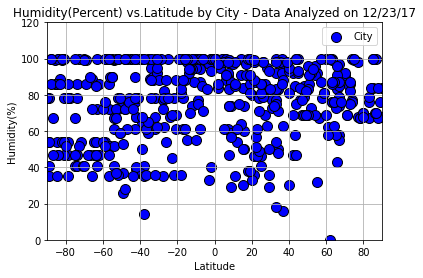

In [163]:
# Build a scatter plot for each data type
plt.scatter(selected_cities["lats"], selected_cities["humidity%"], color='b',edgecolor="black", linewidths=1, marker="o",s=100, alpha=1, label='City')

# Incorporate the other graph properties
plt.title("Humidity(Percent) vs.Latitude by City - Data Analyzed on %s" %(time.strftime("%x")))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([0,120])
plt.legend()

# Save the figure
plt.savefig("city_weather_equator_hum.png")

# Show plot
plt.show()

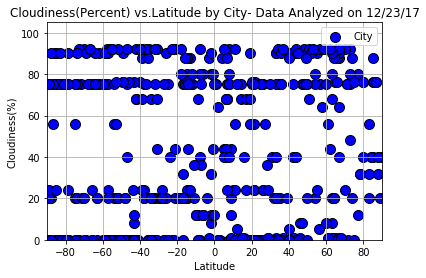

In [164]:
# Build a scatter plot for each data type
plt.scatter(selected_cities["lats"], 
            selected_cities["cloudiness%"], color='b',
            edgecolor="black", linewidths=1, marker="o",s=100, alpha=1, label='City')

# Incorporate the other graph properties
plt.title("Cloudiness(Percent) vs.Latitude by City- Data Analyzed on %s" %(time.strftime("%x")))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([0, 105])
plt.legend()

# Save the figure
plt.savefig("city_weather_equator_cloud.png")

# Show plot
plt.show()

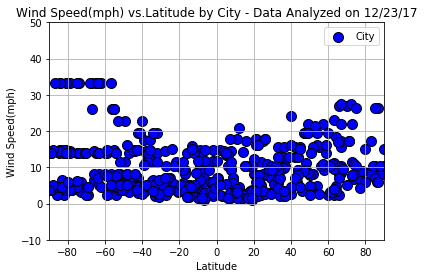

In [165]:
# Build a scatter plot for each data type
plt.scatter(selected_cities["lats"], 
            selected_cities["windspeed"], color='b',
            edgecolor="black", linewidths=1, marker="o",s=100, alpha=1, label='City')

# Incorporate the other graph properties
plt.title("Wind Speed(mph) vs.Latitude by City - Data Analyzed on %s" %(time.strftime("%x")))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([-10, 50])
plt.legend()

# Save the figure
plt.savefig("city_weather_equator_windspeed.png")

# Show plot
plt.show()